<a href="https://colab.research.google.com/github/PunitRaveendran/ACM/blob/main/Main%20task%20of%20Cycle%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy of the model: 66.95 %

Classification Report:
               precision    recall  f1-score   support

    Negative       0.68      0.74      0.71    210000
     Neutral       0.11      0.00      0.00     60000
    Positive       0.66      0.79      0.72    210000

    accuracy                           0.67    480000
   macro avg       0.48      0.51      0.48    480000
weighted avg       0.60      0.67      0.62    480000



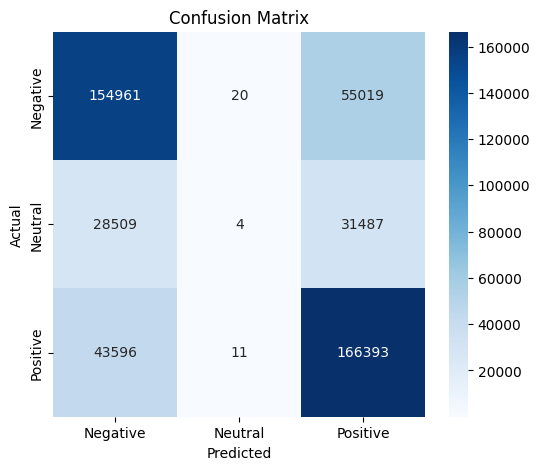

              precision    recall  f1-score   support

    Negative       0.68      0.74      0.71    210000
     Neutral       0.11      0.00      0.00     60000
    Positive       0.66      0.79      0.72    210000

    accuracy                           0.67    480000
   macro avg       0.48      0.51      0.48    480000
weighted avg       0.60      0.67      0.62    480000

Deliverable write ups

Logistic Regression is the  model that is used here as it is as fast and easily interpretable model,
since this is text classification this is a pretty good classifier and this is pretty good with TF-IDF that is a sparse text vectorizer.

TF-IDF (Term Frequency – Inverse Document Frequency
Keeps a note of rare yet important words, the stopwords are all removed thereby the discriminative words for classifying the sentiment gets better.

issues faced
I got an error stating no neutral data were present in the file
so I had to create a sample of neutral tweets from the positive and negative tw

In [3]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#TASK 1
# Load only the columns we need
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv.zip", encoding='latin-1', usecols=[0, 5],names=['target', 'text'])

# Create a sample of neutral tweets by taking from positive and negative
neutral_sample_size = 200000  # Creating 2  lakh neutral tweets
positive_sample = df[df['target'] == 4].sample(n=neutral_sample_size // 2, random_state=42)
negative_sample = df[df['target'] == 0].sample(n=neutral_sample_size // 2, random_state=42)

# Combine and label them as neutral (2)
neutral_df = pd.concat([positive_sample, negative_sample])
neutral_df['target'] = 2

# Add the neutral data back to the original dataframe
df.loc[neutral_df.index, 'target'] = 2


# Mapping the sentiment values to labels
sentiment_map = {0: 'negative', 2: 'neutral', 4: 'positive'}
df['sentiment'] = df['target'].map(sentiment_map)

# Dropping the original target column
df.drop('target', axis=1, inplace=True)

df.head()

#TASK 2
def clean_tweet(tweet):
    tweet = tweet.lower()  # converting it to lowercase
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)  # remove URLs
    tweet = re.sub(r"@\w+", '', tweet)  # remove mentions
    tweet = re.sub(r"#", '', tweet)  # remove hashtag symbol, keep word
    tweet = re.sub(r"[^\w\s]", '', tweet)  # remove punctuation/special chars
    tweet = re.sub(r"\d+", '', tweet)  # remove numbers
    tweet = re.sub(r"\s+", ' ', tweet).strip()  # remove extra spaces
    return tweet

# Apply to the dataset
df['clean_text'] = df['text'].apply(clean_tweet)
df[['clean_text', 'sentiment']].head()

# Map string labels to numeric (optional)
numeric_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['label'] = df['sentiment'].map(numeric_map)

df[['clean_text', 'sentiment', 'label']].head()
df['sentiment'].value_counts()

#TASK 3
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # top 5000 words
X = tfidf.fit_transform(df['clean_text'])
# Output is a sparse matrix of shape (n_samples, 5000)
X.shape

#TASK 4
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

#TASK 5
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=labels))

print("Deliverable write ups")
print("\nLogistic Regression is the  model that is used here as it is as fast and easily interpretable model,")
print("since this is text classification this is a pretty good classifier and this is pretty good with TF-IDF that is a sparse text vectorizer.")

print("\nTF-IDF (Term Frequency – Inverse Document Frequency")
print("Keeps a note of rare yet important words, the stopwords are all removed thereby the discriminative words for classifying the sentiment gets better.")
print("\nissues faced")
print("I got an error stating no neutral data were present in the file")
print("so I had to create a sample of neutral tweets from the positive and negative tweet typies present")
print("none of the task involved removing specific characters were involved")
print("so had to learn that otherwise others were pretty fine as this task was all the phase tasks compiled.")


